In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

In [6]:
# Step 1: Load dataset
df = pd.read_csv('dataset.csv')


In [7]:
# Step 2: Prepare features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 4: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# Step 5: Make predictions
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1] 


In [11]:
# Step 6: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

In [12]:
# Step 7: Print evaluation
print("Confusion Matrix:")
print(conf_matrix)
print()

Confusion Matrix:
[[78 21]
 [18 37]]



In [13]:
print(f"True Positives (TP = {tp}): These are diabetic patients the model correctly predicted as diabetic.")
print(f"False Negatives (FN = {fn}): These are diabetic patients the model failed to identify (predicted as non-diabetic).")
print(f"True Negatives (TN = {tn}): These are non-diabetics the model correctly predicted.")
print(f"False Positives (FP = {fp}): These are non-diabetics wrongly predicted as diabetic.\n")

print(f"Model Accuracy: {round(accuracy * 100, 2)}%\n")
print(f"Precision = {round(precision, 2)} → Of all patients predicted as diabetic, this is the proportion who are actually diabetic.")
print(f"Recall    = {round(recall, 2)} → Of all actual diabetic patients, this is the proportion the model correctly identified.")
print(f"F1 Score  = {round(f1, 2)} → This is the harmonic mean of Precision and Recall.\n")


True Positives (TP = 37): These are diabetic patients the model correctly predicted as diabetic.
False Negatives (FN = 18): These are diabetic patients the model failed to identify (predicted as non-diabetic).
True Negatives (TN = 78): These are non-diabetics the model correctly predicted.
False Positives (FP = 21): These are non-diabetics wrongly predicted as diabetic.

Model Accuracy: 74.68%

Precision = 0.64 → Of all patients predicted as diabetic, this is the proportion who are actually diabetic.
Recall    = 0.67 → Of all actual diabetic patients, this is the proportion the model correctly identified.
F1 Score  = 0.65 → This is the harmonic mean of Precision and Recall.



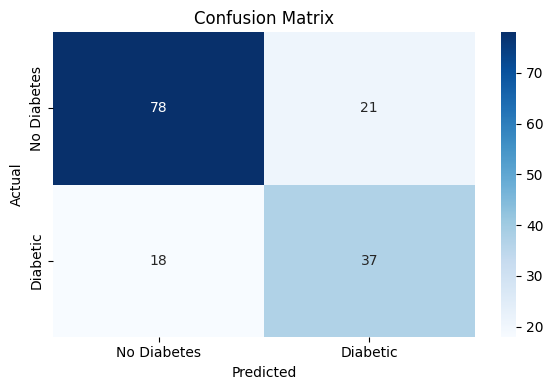

In [14]:
# Step 8: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetic"], yticklabels=["No Diabetes", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

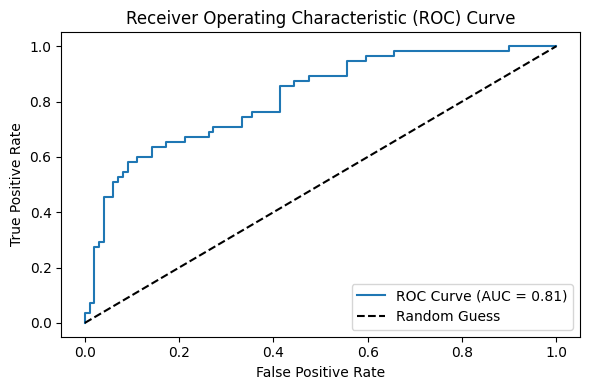

In [15]:
# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()